In [12]:
import urllib 
from bs4 import BeautifulSoup  
import logging  
from urllib.request import urlopen
import requests
import re
import pandas as pd
from collections import defaultdict
import pickle
import numpy as np
import pandas as pd
import dateutil.parser
from datetime import timedelta

In [13]:
with open('MovieDict.pickle', 'rb') as handle:
  b = pickle.load(handle)

In [14]:
df1 = pd.DataFrame(b)

In [15]:
len(df1)

1902

In [16]:
[k for k,v in df1['directors'][0].items()]

['Ron Howard']

In [17]:
len(df1['directors'])

1902

In [18]:
df1.head()

,actors,directors,domestic_total_gross,production,rating,release_date,runtime,title,url
0,"{'Jim Carrey': ([-455 days, 0:00:00], '0', 196...","{'Ron Howard': ([-812 days, 0:00:00], '0', 195...",260044825,123000000,PG,2000-11-17,104,How the Grinch Stole Christmas,http://www.boxofficemojo.com/movies/?id=grinch...
1,"{'Helen Hunt': ([-924 days, 0:00:00], '1', 196...","{'Robert Zemeckis': ([-1062 days, 0:00:00], No...",233632142,90000000,PG-13,2000-12-22,143,Cast Away,http://www.boxofficemojo.com/movies/?id=castaw...
2,"{'Brendan Gleeson': ([-49 days, 0:00:00], '0',...","{'John Woo': ([-2155 days, 0:00:00], None, 194...",215409889,125000000,PG-13,2000-05-24,123,Mission: Impossible II,http://www.boxofficemojo.com/movies/?id=mi2.htm
3,"{'Russell Crowe': ([-392 days, 0:00:00], '0', ...","{'Ridley Scott': ([-294 days, 0:00:00], None, ...",187705427,103000000,R,2000-05-05,155,Gladiator,http://www.boxofficemojo.com/movies/?id=gladia...
4,"{'Alan Alda': ([-189 days, 0:00:00], '0', 1936...","{'Nancy Meyers': ([-2100 days, 0:00:00], None,...",182811707,70000000,PG-13,2000-12-15,127,What Women Want,http://www.boxofficemojo.com/movies/?id=whatwo...


In [19]:
data1 = pd.DataFrame()
for i in range(0, len(df1['directors'])):
    directors = pd.DataFrame(df1['directors'][i])
    directors=directors.T
    directors['title']=df1['title'][i]
    directors['Domestic'] = df1['domestic_total_gross'][i]
    directors['production'] = df1['production'][i]
    directors['runtime'] = df1['runtime'][i]
    directors['release_date'] = df1['release_date'][i]
    data1 = data1.append(directors)
#actors.append(df['actors'][1])
# data1.columns = ['time passed', 'gender']
data1 = data1.reset_index()
#data2 = data2.reset_index()
# data2
data1.rename(columns={'index': 'director', 0: 'days passed directors', 1: 'director_gender', 2: 'director_bday'}, inplace=True)
data1['days passed directors'] = data1['days passed directors'].apply(lambda x: abs(x[0]) if isinstance(x, list) else None)
data1['release_date'] = data1['release_date'].apply(lambda x: pd.to_datetime(x))
data1['director_bday'] = data1['director_bday'].apply(lambda x: pd.to_datetime(x))
data1['director_age'] = abs(data1['director_bday'] - data1['release_date'])
data1 = data1.drop('director_gender', 1)

In [20]:
data2 = pd.DataFrame()
for i in range(0, len(df1['actors'])):
    actors = pd.DataFrame(df1['actors'][i])
    actors=actors.T
    #actors['directors'] = df1['directors'][i]
    actors['title']=df1['title'][i]
    actors['Domestic'] = df1['domestic_total_gross'][i]
    actors['production'] = df1['production'][i]
    actors['runtime'] = df1['runtime'][i]
    actors['release_date'] = df1['release_date'][i]
    data2 = data2.append(actors)
data2 = data2.reset_index()
data2.rename(columns={'index': 'actor', 0: 'days passed actors', 1: 'actor_gender', 2: 'actor_bday'}, inplace=True)
data2['days passed actors'] = data2['days passed actors'].apply(lambda x: abs(x[0]) if isinstance(x, list) else None)
data2['release_date'] = data2['release_date'].apply(lambda x: pd.to_datetime(x))
data2['actor_bday'] = data2['actor_bday'].apply(lambda x: pd.to_datetime(x))
data2['actor_age'] = abs(data2['actor_bday'] - data2['release_date'])

In [21]:
data1.head(2)

,director,days passed directors,director_bday,title,Domestic,production,runtime,release_date,director_age
0,Ron Howard,812 days,1954-03-01,How the Grinch Stole Christmas,260044825,123000000,104,2000-11-17,17063 days
1,Robert Zemeckis,1062 days,1952-05-14,Cast Away,233632142,90000000,143,2000-12-22,17754 days


In [22]:
data2.head(2)

,actor,days passed actors,actor_gender,actor_bday,title,Domestic,production,runtime,release_date,actor_age
0,Anthony Hopkins,140 days,0,1937-12-31,How the Grinch Stole Christmas,260044825,123000000,104,2000-11-17,22967 days
1,Jim Carrey,455 days,0,1962-01-17,How the Grinch Stole Christmas,260044825,123000000,104,2000-11-17,14184 days


In [23]:
final = pd.merge(data1, data2, on = ['title','production', 'Domestic','runtime', 'release_date'])
final['ROI'] = final['Domestic']/final['production']
final

,director,days passed directors,director_bday,title,Domestic,production,runtime,release_date,director_age,actor,days passed actors,actor_gender,actor_bday,actor_age,ROI
0,Ron Howard,812 days,1954-03-01,How the Grinch Stole Christmas,260044825,123000000,104,2000-11-17,17063 days,Anthony Hopkins,140 days,0,1937-12-31,22967 days,2.114186
1,Ron Howard,812 days,1954-03-01,How the Grinch Stole Christmas,260044825,123000000,104,2000-11-17,17063 days,Jim Carrey,455 days,0,1962-01-17,14184 days,2.114186
2,Robert Zemeckis,1062 days,1952-05-14,Cast Away,233632142,90000000,143,2000-12-22,17754 days,Helen Hunt,924 days,1,1963-06-15,13705 days,2.595913
3,Robert Zemeckis,1062 days,1952-05-14,Cast Away,233632142,90000000,143,2000-12-22,17754 days,Tom Hanks,672 days,0,1956-07-09,16237 days,2.595913
4,John Woo,2155 days,1946-05-01,Mission: Impossible II,215409889,125000000,123,2000-05-24,19747 days,Anthony Hopkins,140 days,0,1937-12-31,22790 days,1.723279
5,John Woo,2155 days,1946-05-01,Mission: Impossible II,215409889,125000000,123,2000-05-24,19747 days,Brendan Gleeson,49 days,0,1955-03-29,16493 days,1.723279
6,John Woo,2155 days,1946-05-01,Mission: Impossible II,215409889,125000000,123,2000-05-24,19747 days,Thandie Newton,812 days,1,1972-11-06,10061 days,1.723279
7,John Woo,2155 days,1946-05-01,Mission: Impossible II,215409889,125000000,123,2000-05-24,19747 days,Tom Cruise,420 days,0,1962-07-03,13840 days,1.723279
8,Ridley Scott,294 days,1937-11-30,Gladiator,187705427,103000000,155,2000-05-05,22802 days,Joaquin Phoenix,217 days,0,1974-10-28,9321 days,1.822383
9,Ridley Scott,294 days,1937-11-30,Gladiator,187705427,103000000,155,2000-05-05,22802 days,Russell Crowe,392 days,0,1964-04-07,13177 days,1.822383


In [24]:
len(data1)

1082

In [25]:
len(data2)

4920

In [26]:
type(final['director_age'][0])

pandas.tslib.Timedelta

In [27]:
final['days passed directors'] = final['days passed directors'].apply(lambda day: abs((np.timedelta64(day) / np.timedelta64(1, 'D')) - 1).astype(int) if day else None)
final['days passed actors'] = final['days passed actors'].apply(lambda day: abs((np.timedelta64(day) / np.timedelta64(1, 'D')) - 1).astype(int) if day else None)
final['director_age'] = final['director_age'].apply(lambda age: abs(((np.timedelta64(age) / np.timedelta64(1, 'D')) - 1)/365).astype(int) if age else None)
final['actor_age'] = final['actor_age'].apply(lambda age: abs(((np.timedelta64(age) / np.timedelta64(1, 'D')) - 1)/365).astype(int) if age else None)
#abs((np.timedelta64(day) / np.timedelta64(1, 'D')) - 1).astype(int)

In [28]:
len(final)

3549

In [29]:
final = final[final['actor_age'] > 0]
final = final[final['director_age'] > 0]
final = final[final['days passed directors'] > 0]
final = final[final['days passed actors'] > 0]

In [30]:
type(final['actor_gender'][0])

str

In [31]:
vals_to_replace = {'0': 'male', '1': 'female'}
final['actor_gender'] = final['actor_gender'].map(vals_to_replace)
final

,director,days passed directors,director_bday,title,Domestic,production,runtime,release_date,director_age,actor,days passed actors,actor_gender,actor_bday,actor_age,ROI
0,Ron Howard,811,1954-03-01,How the Grinch Stole Christmas,260044825,123000000,104,2000-11-17,46,Anthony Hopkins,139,male,1937-12-31,62,2.114186
1,Ron Howard,811,1954-03-01,How the Grinch Stole Christmas,260044825,123000000,104,2000-11-17,46,Jim Carrey,454,male,1962-01-17,38,2.114186
2,Robert Zemeckis,1061,1952-05-14,Cast Away,233632142,90000000,143,2000-12-22,48,Helen Hunt,923,female,1963-06-15,37,2.595913
3,Robert Zemeckis,1061,1952-05-14,Cast Away,233632142,90000000,143,2000-12-22,48,Tom Hanks,671,male,1956-07-09,44,2.595913
4,John Woo,2154,1946-05-01,Mission: Impossible II,215409889,125000000,123,2000-05-24,54,Anthony Hopkins,139,male,1937-12-31,62,1.723279
5,John Woo,2154,1946-05-01,Mission: Impossible II,215409889,125000000,123,2000-05-24,54,Brendan Gleeson,48,male,1955-03-29,45,1.723279
6,John Woo,2154,1946-05-01,Mission: Impossible II,215409889,125000000,123,2000-05-24,54,Thandie Newton,811,female,1972-11-06,27,1.723279
7,John Woo,2154,1946-05-01,Mission: Impossible II,215409889,125000000,123,2000-05-24,54,Tom Cruise,419,male,1962-07-03,37,1.723279
8,Ridley Scott,293,1937-11-30,Gladiator,187705427,103000000,155,2000-05-05,62,Joaquin Phoenix,216,male,1974-10-28,25,1.822383
9,Ridley Scott,293,1937-11-30,Gladiator,187705427,103000000,155,2000-05-05,62,Russell Crowe,391,male,1964-04-07,36,1.822383


In [32]:
male = final[final['actor_gender'] == 'male']
female = final[final['actor_gender'] == 'female']

In [33]:
final = final.dropna()
male = male.dropna()
female = female.dropna()

In [34]:
len(final)

2110

In [35]:
len(male)

1442

In [36]:
len(female)

668

## Plots

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
import seaborn as sns
%matplotlib inline
pal = dict(male="#6495ED", female="#F08080")

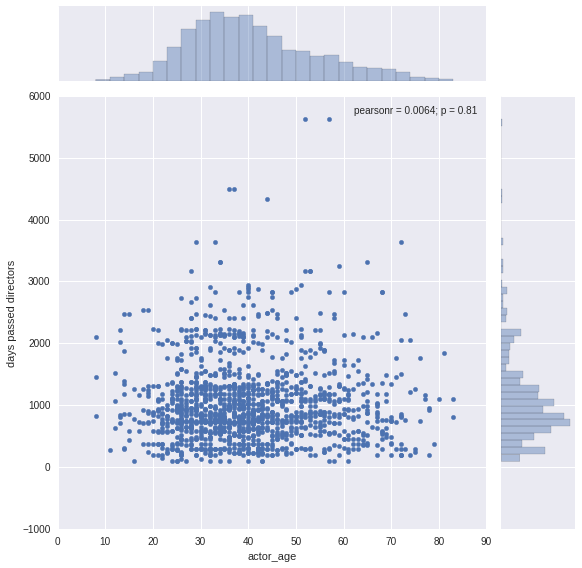

In [38]:
sns.jointplot(x = 'actor_age', y = 'days passed directors', data = male, size = 8)

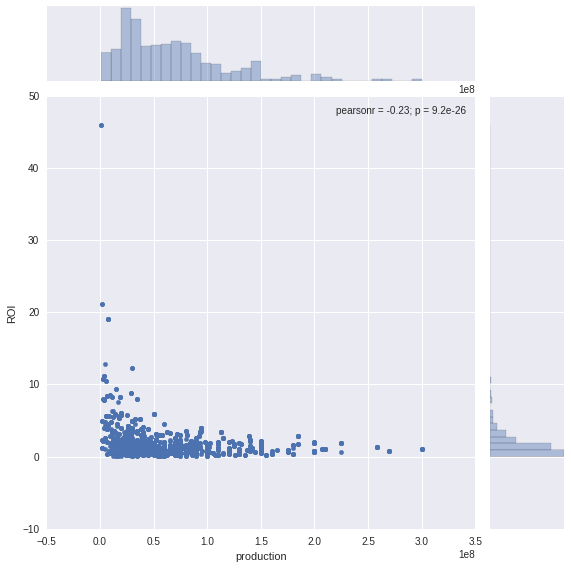

In [39]:
sns.jointplot(y = 'ROI', x = 'production', data = final, size = 8)

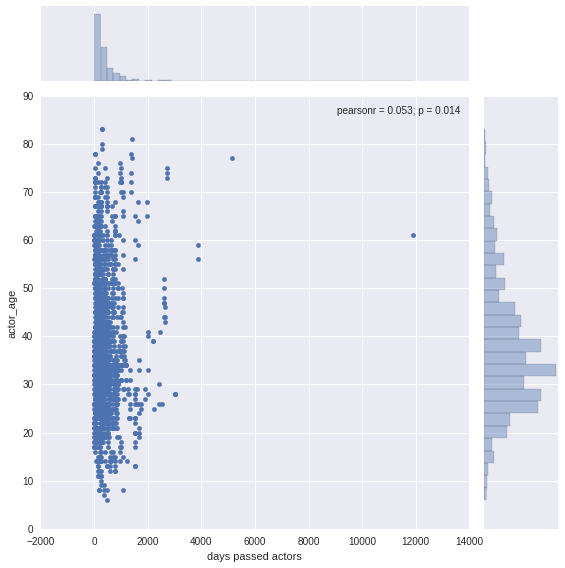

In [40]:
sns.jointplot(y = 'actor_age', x = 'days passed actors', data = final, size = 8)

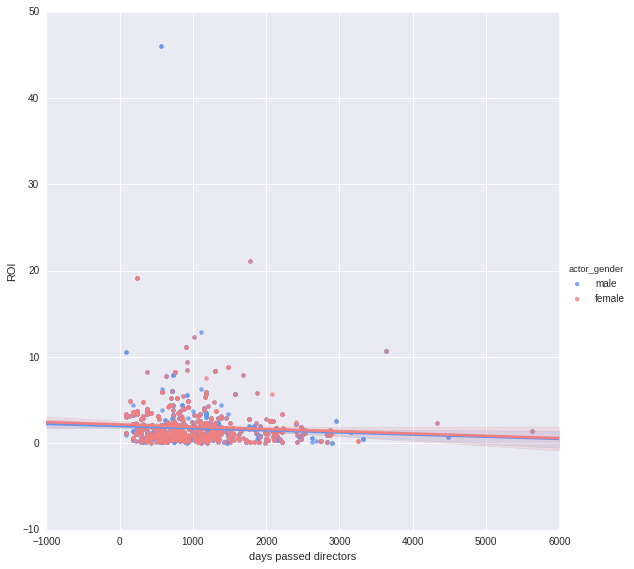

In [41]:
sns.lmplot(y = 'ROI', x = 'days passed directors', data = final, size = 8, hue='actor_gender', palette = pal)

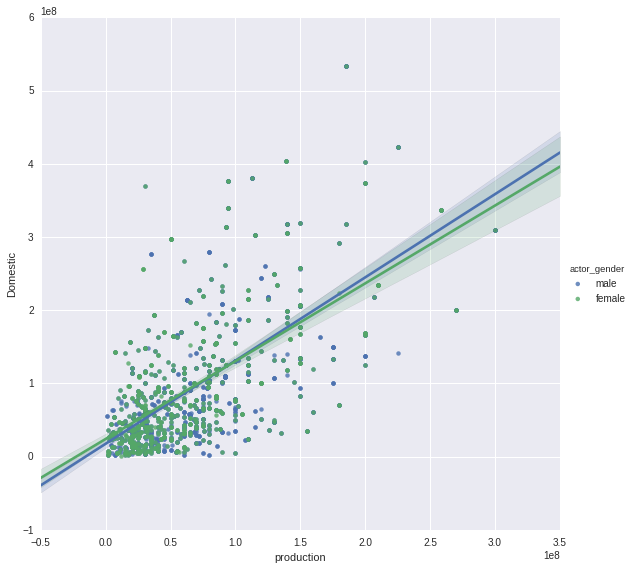

In [42]:
sns.lmplot(y = 'Domestic', x = 'production', data = final, size = 8, hue='actor_gender')

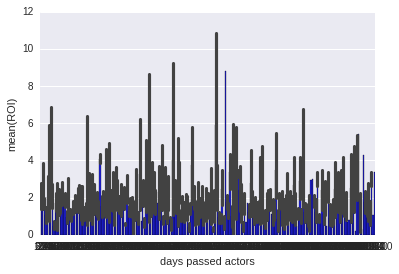

In [43]:
sns.barplot(x="days passed actors", y="ROI", data=final,
            label="Total", color="b")

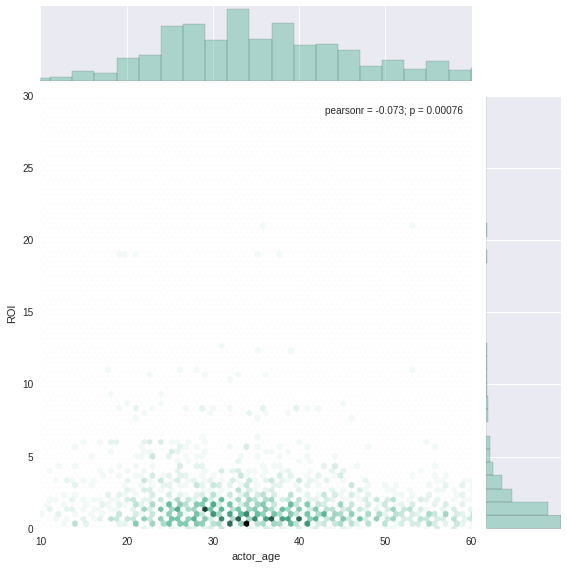

In [44]:
sns.jointplot(x = 'actor_age', y = 'ROI', data = final, size = 8, ylim=(0, 30), xlim=(10, 60), kind = 'hex', color="#4CB391")

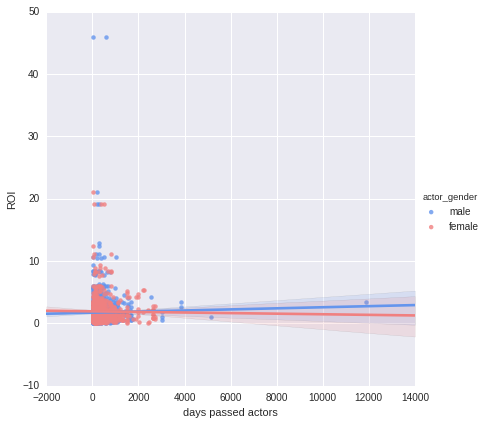

In [45]:
%matplotlib inline
sns.lmplot(y = 'ROI', x = 'days passed actors', data = final, size=6, hue='actor_gender', palette = pal)

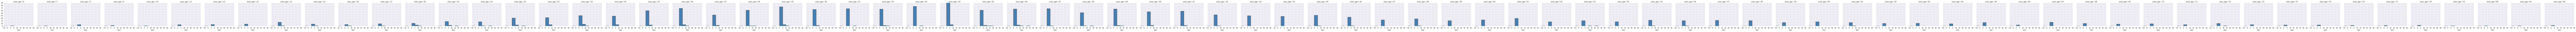

In [46]:
g = sns.FacetGrid(final, col="actor_age", margin_titles=True)
bins = np.linspace(-10, 35, 10)
g.map(plt.hist, "ROI", color="steelblue", bins=bins, lw=1)

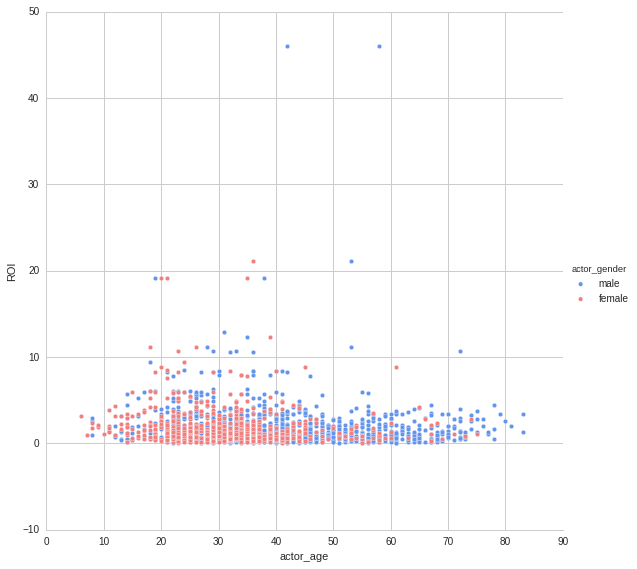

In [102]:
sns.pairplot(final, hue="actor_gender", y_vars = 'ROI', x_vars = 'actor_age', palette = pal, size = 8)

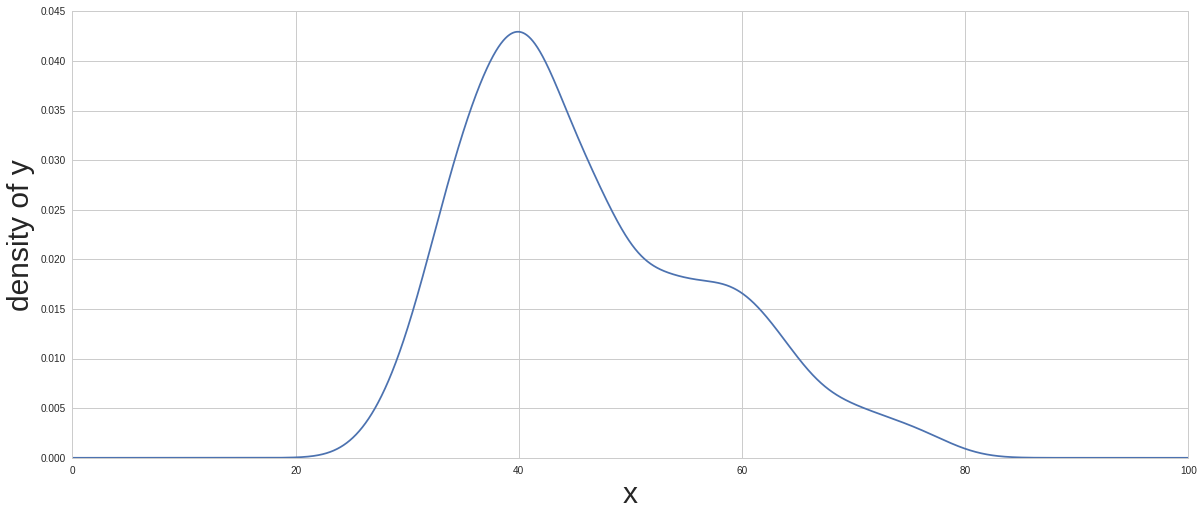

In [116]:
xs = np.linspace(0,100,3200)
density_1 = gaussian_kde(final['director_age'].dropna())
density_1.covariance_factor = lambda : .25
density_1._compute_covariance()
plt.figure(figsize = (20,8))
plt.plot(xs,density_1(xs))
plt.fill(xs,density_1(xs),'b',alpha=0)
plt.xlabel('x',fontsize=30)    #add an x label
plt.ylabel('density of y',fontsize=30)    #add a y label
#plt.text(np.mean(final['director_age'].dropna()),max(density_1(xs))/2.0,r'$\widehat{x}_1$',fontsize=30)   

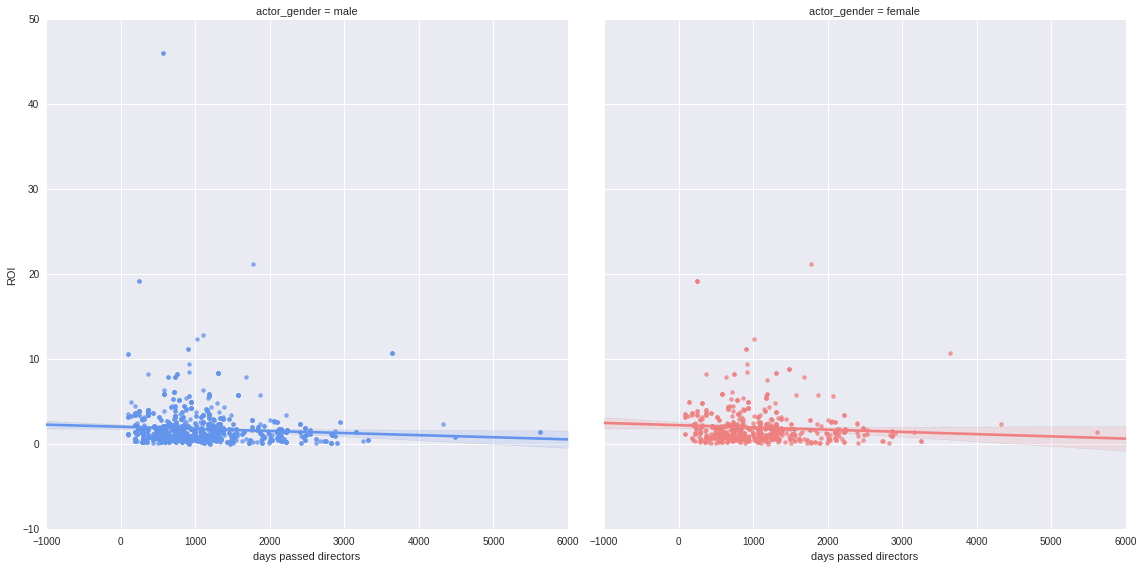

In [54]:
pal = dict(male="#6495ED", female="#F08080")
g = sns.lmplot( "days passed directors", "ROI", data = final, col = 'actor_gender' ,hue='actor_gender', palette =pal, size=8)

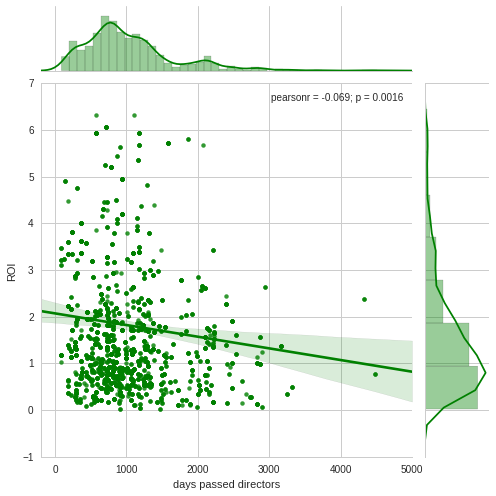

In [104]:
g = sns.jointplot( "days passed directors", "ROI", data=final, kind="reg",ylim=(-1, 7), xlim=(-200, 5000), color="g", size=7)

## Models

In [57]:
director = final.groupby('director').mean().sort_values(by=['actor_age'],ascending=False)
director = director.reset_index()
director = director[['director','actor_age','ROI','Domestic',]]
director.head()

,director,actor_age,ROI,Domestic
0,Scott Hicks,63.0,0.780186,24185781.0
1,Sylvester Stallone,60.5,1.891519,56512524.0
2,Michael Radford,60.0,0.125520,3765585.0
3,Brad Bird,59.0,2.475389,247692232.5
4,Andrew Stanton,58.0,1.243379,223808164.0


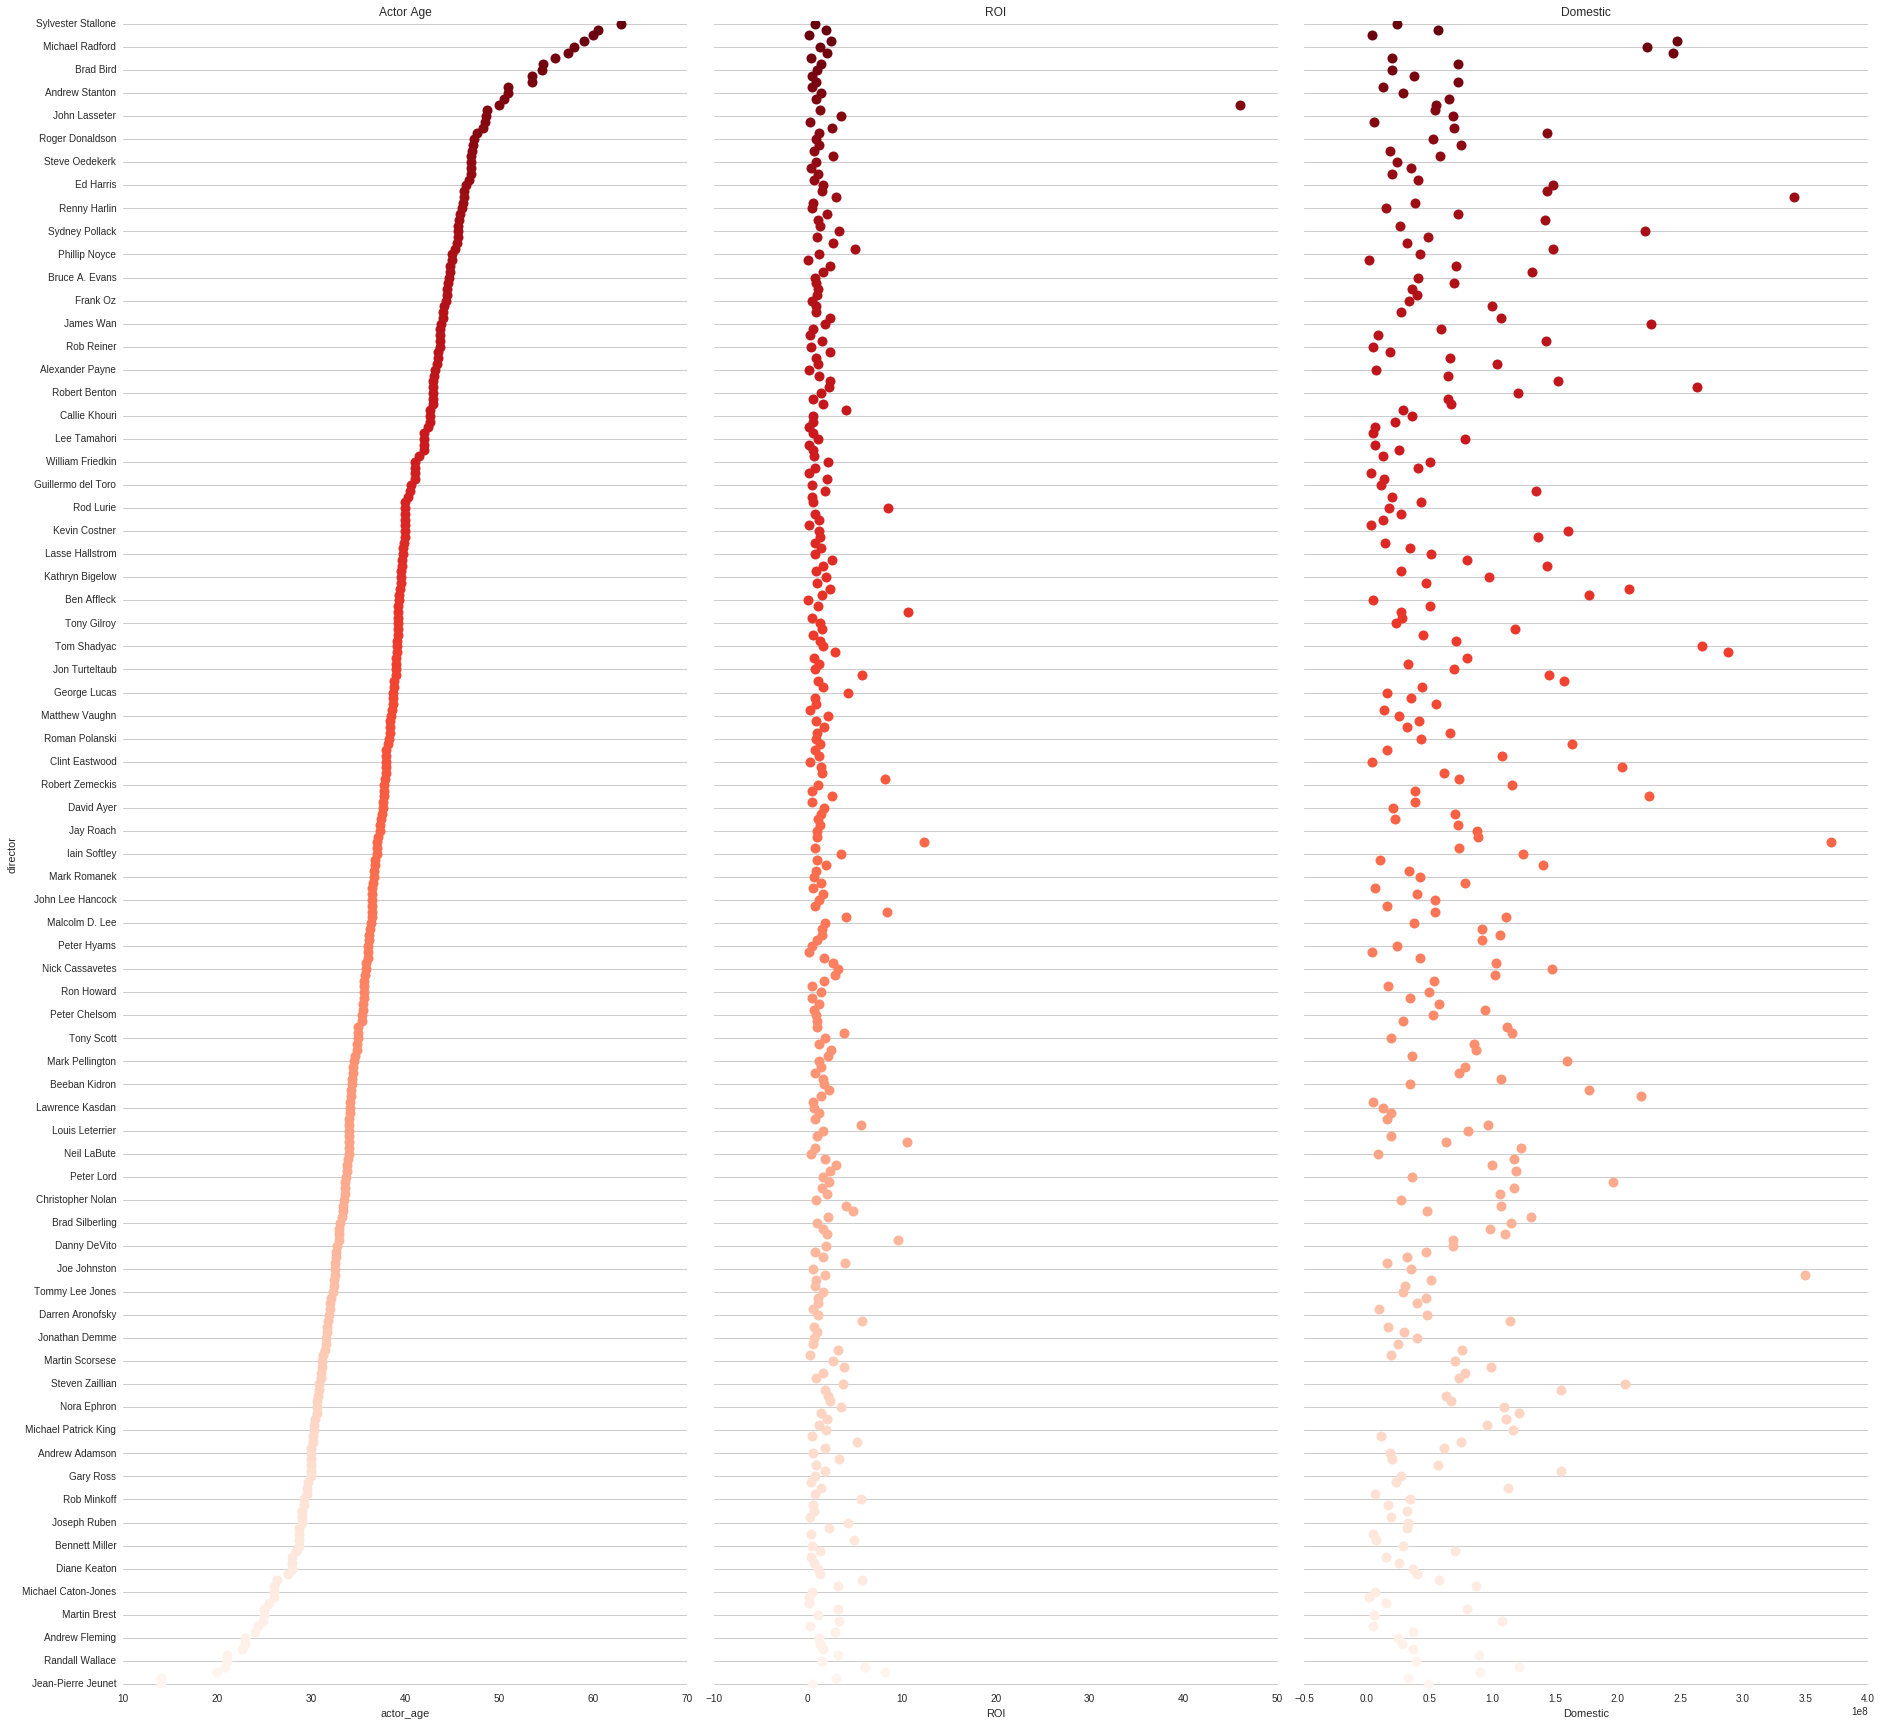

In [58]:
import matplotlib.ticker as ticker
sns.set(style="whitegrid")

g = sns.PairGrid(director, x_vars=director.columns[1:4], y_vars= ['director'], size=24, aspect=.35)

g.map(sns.stripplot, size=10, orient="h", palette="Reds_r", edgecolor="gray")

titles = ['Actor Age','ROI','Domestic']#'Days Passed Since Last Movie','ROI','Domestic',]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
    ax.yaxis.set_major_locator(ticker.MultipleLocator(4))


sns.despine(left=True, bottom=True)


In [87]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import KFold, train_test_split
from patsy import dmatrices, dmatrix
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import linregress
from pylab import plot,show,hist
from sklearn.preprocessing import normalize

In [60]:
final.head(2)

,director,days passed directors,director_bday,title,Domestic,production,runtime,release_date,director_age,actor,days passed actors,actor_gender,actor_bday,actor_age,ROI
0,Ron Howard,811,1954-03-01,How the Grinch Stole Christmas,260044825,123000000,104,2000-11-17,46,Anthony Hopkins,139,male,1937-12-31,62,2.114186
1,Ron Howard,811,1954-03-01,How the Grinch Stole Christmas,260044825,123000000,104,2000-11-17,46,Jim Carrey,454,male,1962-01-17,38,2.114186


In [61]:
data = final.ix[:, (1,4,5,6,8,10,13,14)]
len(data)

2110

In [62]:
data.head()

,days passed directors,Domestic,production,runtime,director_age,days passed actors,actor_age,ROI
0,811,260044825,123000000,104,46,139,62,2.114186
1,811,260044825,123000000,104,46,454,38,2.114186
2,1061,233632142,90000000,143,48,923,37,2.595913
3,1061,233632142,90000000,143,48,671,44,2.595913
4,2154,215409889,125000000,123,54,139,62,1.723279


In [124]:
y = data['Domestic']
X = data.drop(['ROI', 'days passed actors', 'actor_age', 'Domestic'], 1)
X['intercept']=1

In [125]:
print(final['actor_age'].min())

6


In [126]:
X.head()

,days passed directors,production,runtime,director_age,intercept
0,811,123000000,104,46,1
1,811,123000000,104,46,1
2,1061,90000000,143,48,1
3,1061,90000000,143,48,1
4,2154,125000000,123,54,1


In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

In [128]:
model = sm.OLS(y_train, X_train)
results = model.fit()

In [129]:
results = model.fit()

In [130]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Domestic   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     304.6
Date:                Fri, 22 Apr 2016   Prob (F-statistic):          3.16e-194
Time:                        11:38:11   Log-Likelihood:                -30739.
No. Observations:                1582   AIC:                         6.149e+04
Df Residuals:                    1577   BIC:                         6.151e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
days passed directors -9346.8330   2494.325     -3.747      0.000     -1.42e+04 -4454.291
production                0.9759      0.036     27.329      0.000         0.906     1.046
runtime                5.718e+05   8.83e+04      6.477      0.000      3.99e+05  7.45e+05
director_age          -1.434e+06   1.55e+05     -9.254      0.000     -1.74e+06 -1.13e+06
intercept              3.802e+07   1.14e+07      3.333      0.001      1.56e+07  6.04e+07
==============================================================================
Omnibus:                      350.212   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              807.971
Skew:                           1.218   Prob(JB):                    3.56e-176
Kurtosis:                       5.515   Cond. No.                     5.78e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.78e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
y_predictTest = results.predict(X_test)

In [72]:
mse = mean_squared_error(y_test, y_predictTest)
mse

5013145438124980.0

MSE measures the vertical spread of the data around the regression line

In [74]:
mse1  = mse(y_test, y_predictTest,  axis=0)
mse1

TypeError: 'numpy.float64' object is not callable

In [75]:
rSquared = r2_score(y_test, y_predictTest)
rSquared

0.44293555259259509

In [76]:
rSqAdj = 1-(1-rSquared)*((len(y_test)-1)/(len(y_test)-len(X_test.columns))-1)
rSqAdj

0.99573946885348064

In [113]:
model2 = sm.OLS(y_test, X_test)

In [114]:
results = model2.fit()

In [115]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Domestic   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     105.9
Date:                Fri, 22 Apr 2016   Prob (F-statistic):           4.88e-66
Time:                        09:58:52   Log-Likelihood:                -10291.
No. Observations:                 528   AIC:                         2.059e+04
Df Residuals:                     523   BIC:                         2.061e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
days passed directors -9040.3005   4774.852     -1.893      0.059     -1.84e+04   339.946
production                1.0946      0.066     16.507      0.000         0.964     1.225
runtime                6.079e+05   1.55e+05      3.915      0.000      3.03e+05  9.13e+05
director_age          -1.739e+06   2.93e+05     -5.939      0.000     -2.31e+06 -1.16e+06
intercept              3.911e+07    2.1e+07      1.862      0.063     -2.15e+06  8.04e+07
==============================================================================
Omnibus:                      134.172   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.400
Skew:                           1.340   Prob(JB):                     4.34e-65
Kurtosis:                       5.508   Cond. No.                     5.88e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.88e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""